In [8]:
# Pandas란?
# ndarray를 기본 자료구조로 이용
# 이 ndarray를 가지고 pandas는 두개의 다른 자료구조를 이용함
# Series, DataFrame

# Series : 동일한 데이터타입의 복수개의 성분으로 구성되는 자료구조
# DataFrame : 엑셀의 테이블같은거
#             Series로 구성됨
import numpy as np
import pandas as pd

# ndarray
arr = np.array([-1,4,5,99], dtype=np.float64)
print(arr)

# Series 
s = pd.Series([-1,4,5,99], dtype=np.float64)
print(s)
print(s.values)
print(s.index)
print(s.dtype)

[-1.  4.  5. 99.]
0    -1.0
1     4.0
2     5.0
3    99.0
dtype: float64
[-1.  4.  5. 99.]
RangeIndex(start=0, stop=4, step=1)
float64


In [16]:
# Series생성시 index를 지정할수있다

s = pd.Series([1,-8,5,10], dtype=np.float64, 
              index=['c','b','c','k'])
print(s)
print(s[0])
print(s['c'])  # 인덱스가 c인거 둘 다 가져옴 # 리턴도 시리즈

print(s[1:3])  # slicing
print(s['b':'k'])  # 위의 숫자인덱스랑 좀 다르다

# Boolean Indexing
print(s[s % 2 == 0])

# Fancy Indexing
print(s[[0,2,3]])

# numpy에서 했던것들 그대로 적용 가능
print(s.sum())

c     1.0
b    -8.0
c     5.0
k    10.0
dtype: float64
1.0
c    1.0
c    5.0
dtype: float64
b   -8.0
c    5.0
dtype: float64
b    -8.0
c     5.0
k    10.0
dtype: float64
b    -8.0
k    10.0
dtype: float64
c     1.0
c     5.0
k    10.0
dtype: float64
8.0


In [21]:
# 평균이 50 표준편차가 5인 정규분포로 랜덤하게 series 생성
# index는 날짜로
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta

start_day = datetime(2020,1,1)

a = pd.Series([int(x) for x in np.random.normal(50, 5, (10,))], 
              dtype=np.int64, 
              index=[start_day+timedelta(days=x) for x in range(10)])
print(a)
b = pd.Series([int(x) for x in np.random.normal(50, 5, (10,))], 
              dtype=np.int64, 
              index=[start_day+timedelta(days=x) for x in range(10)])
print(b)

print(a+b)  # 인덱스를 기준으로 같은 인덱스끼리 더하게 됨!!

# index가 다르면?
start_day = datetime(2020,1,5)
c = pd.Series([int(x) for x in np.random.normal(50, 5, (10,))], 
              dtype=np.int64, 
              index=[start_day+timedelta(days=x) for x in range(10)])
print(c)
print(a+c)

2020-01-01    48
2020-01-02    50
2020-01-03    51
2020-01-04    53
2020-01-05    51
2020-01-06    38
2020-01-07    50
2020-01-08    56
2020-01-09    50
2020-01-10    53
dtype: int64
2020-01-01    48
2020-01-02    49
2020-01-03    47
2020-01-04    44
2020-01-05    55
2020-01-06    46
2020-01-07    55
2020-01-08    44
2020-01-09    45
2020-01-10    42
dtype: int64
2020-01-01     96
2020-01-02     99
2020-01-03     98
2020-01-04     97
2020-01-05    106
2020-01-06     84
2020-01-07    105
2020-01-08    100
2020-01-09     95
2020-01-10     95
dtype: int64
2020-01-05    49
2020-01-06    42
2020-01-07    51
2020-01-08    52
2020-01-09    48
2020-01-10    40
2020-01-11    55
2020-01-12    46
2020-01-13    50
2020-01-14    46
dtype: int64
2020-01-01      NaN
2020-01-02      NaN
2020-01-03      NaN
2020-01-04      NaN
2020-01-05    100.0
2020-01-06     80.0
2020-01-07    101.0
2020-01-08    108.0
2020-01-09     98.0
2020-01-10     93.0
2020-01-11      NaN
2020-01-12      NaN
2020-01-13      Na

In [24]:
s = pd.Series([1,2,3,4])
print(s)
s[4]=100  # 그냥 이렇게 추가해도 된다
print(s)
s=s.drop(2) # 지우기
print(s)

0    1
1    2
2    3
3    4
dtype: int64
0      1
1      2
2      3
3      4
4    100
dtype: int64
0      1
1      2
3      4
4    100
dtype: int64


In [27]:
# 딕셔너리로 시리즈 만들기
my_dict = { '서울':1000, '부산':2000, '제주':3000}
s = pd.Series(my_dict)
s.name = '지역별 가격 데이터'
s.index.name = '지역명'
print(s)

지역명
서울    1000
부산    2000
제주    3000
Name: 지역별 가격 데이터, dtype: int64


In [32]:
## pandas DataFrame
# 딕셔너리의 키가 dataframe의 column으로 들어감
# 데이타프레임은 시리즈의 집합
import numpy as np
import pandas as pd

# dictionary
data = { 'names': ['아이유', '김연아', '홍길동', '이순신'], 
        'year': [2015, 2019, 2013, 2017], 
        'points': [3.5, 1.5, 2.0, 4.0]}

# DataFrame을 생성
df = pd.DataFrame(data)

# 출력, 출력할때는 display()가 이쁨
print(df)
display(df)

# 여러 기능들
print(df.shape)
print(df.size)
print(df.ndim)

  names  year  points
0   아이유  2015     3.5
1   김연아  2019     1.5
2   홍길동  2013     2.0
3   이순신  2017     4.0


,names,year,points
0,아이유,2015,3.5
1,김연아,2019,1.5
2,홍길동,2013,2.0
3,이순신,2017,4.0


(4, 3)
12
2


In [37]:
# DataFrame의 index, values, 
import numpy as np
import pandas as pd

data = { 'names': ['아이유', '김연아', '홍길동', '강감찬', '이순신'], 
        'year': [2015, 2019, 2013, 2014, 2017], 
        'points': [3.5, 1.5, 2.0, 3.0, 4.0]}

df = pd.DataFrame(data)

display(df)

print(df.index) # RangeIndex(start=0, stop=5, step=1)
print(df.columns) # Index(['names', 'year', 'points'], dtype='object')
print(df.values) # 2차원 ndarray

df.index.name = '학번'
df.columns.name = '학생정보'
display(df)

,names,year,points
0,아이유,2015,3.5
1,김연아,2019,1.5
2,홍길동,2013,2.0
3,강감찬,2014,3.0
4,이순신,2017,4.0


RangeIndex(start=0, stop=5, step=1)
Index(['names', 'year', 'points'], dtype='object')
[['아이유' 2015 3.5]
 ['김연아' 2019 1.5]
 ['홍길동' 2013 2.0]
 ['강감찬' 2014 3.0]
 ['이순신' 2017 4.0]]


학생정보,names,year,points
학번,,,
0,아이유,2015,3.5
1,김연아,2019,1.5
2,홍길동,2013,2.0
3,강감찬,2014,3.0
4,이순신,2017,4.0


In [39]:
# 데이터프레임을 만드는 다른 방법 1.

# csv파일을 하나 만들어

dfs = pd.read_csv('./data/student.csv')

display(dfs)

,이름,입학연도,성적
0,아이유,2015,2.0
1,김연아,2016,1.5
2,홍길동,2020,3.0
3,강감찬,2013,3.7
4,이순신,2017,3.9


In [47]:
# movies.csv 읽어보기

df = pd.read_csv('./data/movies.csv',encoding='cp949')
display(df)

display(df.head()) # 앞의 5행만
display(df.tail()) # 뒤의 5행만

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [49]:
# 데이터프레임을 만드는 다른 방법 2.
# database로 만들기
# 여러가지 DBMS제품들이 있음
# Oracle이나 MySQL, SQLite 등등

# MySQL 쓸 예정. 이걸로 db만들고 pandas로 database 가져올꺼
# 5.6버전 씀

# 1. 압축풀기 바탕화면에
# 2. mysqld 실행하기
# 3. MySQL Server를 실행했기 때문에 MySQL console에 접속할수있음
# 4. 중지하려면? - 그냥 x하면 안됨, 새로운 도스창 -> 해당 bin폴더 이동
#                                  -> mysqladmin -u root shutdown 입력
# 5. 접속 - cmd창 하나 더 열어서 bin폴더 가서 mysql -u root
# 6. 새로운 사용자 생성 
#    -> create user data identified by "data";
# 7. 새 사용자 하나 더 생성해야함
#    -> create user data@localhost identified by "data";
# 8. 데이터베이스 생성 
#    -> create database library;
# 9. 새롭게 생성한 데이터베이스의 사용권한을 사용자에게 부여!
#    -> grant all privileges on library.* to data;
#    -> grant all privileges on library.* to data@localhost;
# 10. 지금까지 한 권한부여 작업을 flush
#    -> flush privileges;
# 11. 작업다했으니 콘솔 종료 -> exit;
# 12. 제공된 파일을 이용해서 실제 데이터베이스를 구축하자
# 13. bin 폴더 도스창에서 실행해보자
#    -> mysql -u data -p library < _BookTableDump.sql


## 이제 pandas로 DataFrame으로 한번 보자
# 패키지 설치 필요 pip install pymysql

import pandas as pd
import pymysql.cursors

conn = pymysql.connect(host='localhost', 
                       user='data', 
                       password='data', 
                       db='library', 
                       charset='utf8')
# 가져옴
# 이걸 DataFrame으로
sql = 'select btitle, bauthor, bprice from book'
df = pd.read_sql(sql, con=conn)
display(df)

,btitle,bauthor,bprice
0,C로 구현한 알고리즘,카일 루든(Kyle Loudon),25000
1,"IT EXPERT, 모바일 자바 프로그래밍","권기경, 박용우",23000
2,초보자를 위한 Linux & Unix C 프로그래밍,"김종훈, 김종진, 김동균",28000
3,스트럿츠 프레임워크 워크북,박재성,20000
4,나는 프로그래머다,임백준외 6명,12800
...,...,...,...
743,허리만 펴도 다이어트 : 날씬 체질로 바꿔주는 하루 1분 스트레칭,기즈 다다아키,10000
744,마사 스튜어트 미술놀이대백과 175,마사 스튜어트 리빙,18000
745,잘 자고 잘 먹는 아기의 시간표,정재호,13800
746,엄마는 약 선생 : 먹이고 바르고 붙이기 전에 꼭 봐야 할 아이 약 사용설명서,윤수진,13800


In [50]:
print(df)

                                          btitle             bauthor  bprice
0                                    C로 구현한 알고리즘  카일 루든(Kyle Loudon)   25000
1                        IT EXPERT, 모바일 자바 프로그래밍            권기경, 박용우   23000
2                   초보자를 위한 Linux & Unix C 프로그래밍       김종훈, 김종진, 김동균   28000
3                                 스트럿츠 프레임워크 워크북                 박재성   20000
4                                      나는 프로그래머다             임백준외 6명   12800
..                                           ...                 ...     ...
743         허리만 펴도 다이어트 : 날씬 체질로 바꿔주는 하루 1분 스트레칭             기즈 다다아키   10000
744                          마사 스튜어트 미술놀이대백과 175          마사 스튜어트 리빙   18000
745                            잘 자고 잘 먹는 아기의 시간표                 정재호   13800
746  엄마는 약 선생 : 먹이고 바르고 붙이기 전에 꼭 봐야 할 아이 약 사용설명서                 윤수진   13800
747                 뇌를 자극하는 오라클 프로그래밍 SQL&PL/SQL                 홍형경   27000

[748 rows x 3 columns]


In [3]:
# database를 사용하는 두가지 방법
# 1. 장고에서 쓴 ORM 방식(Model이용)
#    장점 : sql 몰라도됨
# 2. 일반적으로 SQL구문을 이용해서 Table을 만짐

import pandas as pd
import pymysql.cursors

conn = pymysql.connect(host='localhost', 
                       user='data', 
                       password='data', 
                       db='library', 
                       charset='utf8')
# 가져옴
# 이걸 DataFrame으로
# sql = 'SELECT btitle, bprice FROM book WHERE bprice > 30000'
sql = 'SELECT btitle, bprice FROM book WHERE btitle like "%java%"'
df = pd.read_sql(sql, con=conn)
display(df)

,btitle,bprice
0,Head First Java: 뇌 회로를 자극하는 자바 학습법(개정판),28000
1,뇌를 자극하는 Java 프로그래밍,27000
2,모던 웹을 위한 JavaScript + jQuery 입문(개정판) : 자바스크립트에...,32000
3,"JavaScript+jQuery 정복 : 보고, 이해하고, 바로 쓰는 자바스크립트 공략집",28000
4,이것이 자바다 : 신용권의 Java 프로그래밍 정복,30000
5,Head First JavaScript Programming : 게임과 퍼즐로 배우...,36000
6,Head First JavaScript : 대화형 웹 애플리케이션의 시작,28000
7,UML과 JAVA로 배우는 객체지향 CBD 실전 프로젝트 : 도서 관리 시스템,40000
8,"IT CookBook, 웹 프로그래밍 입문 : XHTML, CSS2, JavaScript",23000
9,자바스크립트 성능 최적화: High Performance JavaScript,20000


In [7]:
# 이렇게 읽은 데이터베이스나 CSV파일을 JSON파일로 저장할수있음
# 방식이 4개정도 있음
import pandas as pd
import pymysql.cursors

conn = pymysql.connect(host='localhost', 
                       user='data', 
                       password='data', 
                       db='library', 
                       charset='utf8')

sql = 'select btitle, bauthor, bprice from book WHERE btitle like "%여행%"'
df = pd.read_sql(sql, con=conn)
display(df)

# 유니코드로 파일 생성 후 데이터 저장해야 한글이 처리가 됨
# 저장폴더는 미리 있어야함

# with : 파일처리할떄 순서는 파일열기 내용쓰기 파일닫기 순서
# with구문을 이용하면 resource의 close처리가 쉬움
with open('./data/json/books_columns.json', 'w', encoding='utf-8') as file:
    df.to_json(file, force_ascii=False, orient='columns')
    # orient='columns' 설정하면 df의 column이 json의 키값으로
with open('./data/json/books_records.json', 'w', encoding='utf-8') as file:
    df.to_json(file, force_ascii=False, orient='records')
with open('./data/json/books_index.json', 'w', encoding='utf-8') as file:
    df.to_json(file, force_ascii=False, orient='index')
with open('./data/json/books_values.json', 'w', encoding='utf-8') as file:
    df.to_json(file, force_ascii=False, orient='values')

,btitle,bauthor,bprice
0,"IT CookBook, C++ 하이킹 : 객체지향과 만나는 여행","성윤정, 김태은",25000
1,게스트하우스 창업 A to Z : 청춘여행자의 낭만적 밥벌이,김아람,15000
2,크로아티아의 작은 마을을 여행하다 : 자다르의 일몰부터 두브로브니크의 붉은 성벽까지,양미석,15800
3,도쿄의 오래된 상점을 여행하다 : 소세키의 당고집부터 백 년 된 여관까지,"여지영, 이진숙",15000


In [10]:
# json파일을 읽어서 DataFrame을 생성해보자

import numpy as np
import pandas as pd
import json

with open('./data/json/books_columns.json', 'r', encoding='utf-8') as file:
    dict_books = json.load(file) # json을 딕셔너리로

print(dict_books)
print(type(dict_books))

df = pd.DataFrame(dict_books)
display(df)

{'btitle': {'0': 'IT CookBook, C++ 하이킹 : 객체지향과 만나는 여행', '1': '게스트하우스 창업 A to Z : 청춘여행자의 낭만적 밥벌이', '2': '크로아티아의 작은 마을을 여행하다 : 자다르의 일몰부터 두브로브니크의 붉은 성벽까지', '3': '도쿄의 오래된 상점을 여행하다 : 소세키의 당고집부터 백 년 된 여관까지'}, 'bauthor': {'0': '성윤정, 김태은', '1': '김아람', '2': '양미석', '3': '여지영, 이진숙'}, 'bprice': {'0': 25000, '1': 15000, '2': 15800, '3': 15000}}
<class 'dict'>


,btitle,bauthor,bprice
0,"IT CookBook, C++ 하이킹 : 객체지향과 만나는 여행","성윤정, 김태은",25000
1,게스트하우스 창업 A to Z : 청춘여행자의 낭만적 밥벌이,김아람,15000
2,크로아티아의 작은 마을을 여행하다 : 자다르의 일몰부터 두브로브니크의 붉은 성벽까지,양미석,15800
3,도쿄의 오래된 상점을 여행하다 : 소세키의 당고집부터 백 년 된 여관까지,"여지영, 이진숙",15000


In [20]:
## OpenApi를 이용해서 DataFrame만들기

import numpy as np
import pandas as pd
import json
import urllib

targetDt = 20200906
openapi_url = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f0272902eed6c66da9aa5a2ed15847b3&targetDt={}".format(targetDt)

load_page = urllib.request.urlopen(openapi_url) # response가 옴
# load_page => response 객체

json_page = json.loads(load_page.read()) # dictionary

json_page_result = json_page['boxOfficeResult']['dailyBoxOfficeList']
df = pd.DataFrame(json_page_result)
display(df)



,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20201122,테넷,2020-08-26,782845430,60.2,-107353070,-12.1,9700940860,82746,-10441,-11.2,1059801,1546,4996
1,2,2,0,OLD,20193666,오! 문희,2020-09-02,290495690,22.3,7265920,2.6,1056312620,32831,-9696,-22.8,134928,1073,4002
2,3,3,0,OLD,20197922,다만 악에서 구하소서,2020-08-05,106880500,8.2,121990,0.1,38219058150,11663,31,0.3,4311893,565,1361
3,4,4,0,OLD,20202281,극장판 짱구는 못말려: 신혼여행 허리케인~ 사라진 아빠!,2020-08-20,32437310,2.5,3945170,13.8,884801770,3895,490,14.4,108703,318,439
4,5,5,0,OLD,20199883,오케이 마담,2020-08-12,26912820,2.1,3712780,16,10909877540,3044,441,16.9,1219289,347,506
5,6,6,0,OLD,20112692,드라이브,2011-11-17,13935080,1.1,-952620,-6.4,204541090,1563,-115,-6.9,25751,118,157
6,7,7,0,OLD,20202961,고스트 오브 워,2020-09-02,11160960,0.9,-849210,-7.1,49382160,1250,-97,-7.2,5754,221,272
7,8,8,21,OLD,20196271,강철비2: 정상회담,2020-07-29,3884000,0.3,3424500,745.3,14635662610,737,689,1435.4,1781685,22,23
8,9,9,-1,OLD,20189973,카일라스 가는 길,2020-09-03,4619600,0.4,708140,18.1,14099960,541,67,14.1,1699,47,54
9,10,10,0,OLD,20205146,아메리칸 잡,2020-09-03,1024480,0.1,-194480,-16,3963820,394,-21,-5.1,1292,33,36


In [23]:
import numpy as np
import pandas as pd

# dict
data = { '이름':['이지은','박동훈','홍길동','강감찬','오혜영'],
       '학과':['컴퓨터','기계','철학','컴퓨터','국어국문'],
       '학년':[1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                  columns=['학과','이름','학점','학년'], 
                  index=['one','two','three','four','five'])
display(df)

# DataFrame의 기본 분석 함수들
# 카운트, 평균, 표준편차 ,최대최소, 분위 등등

# describe : DataFrame안에 있는 숫자 연산이 가능한 column에서 
# 기본분석함수를 적용해서 수치값들을 리턴
df.describe()  

,학과,이름,학점,학년
one,컴퓨터,이지은,1.5,1
two,기계,박동훈,2.0,2
three,철학,홍길동,3.1,2
four,컴퓨터,강감찬,1.1,4
five,국어국문,오혜영,2.7,3


,학점,학년
count,5.000000,5.000000
mean,2.080000,2.400000
std,0.825833,1.140175
min,1.100000,1.000000
25%,1.500000,2.000000
50%,2.000000,2.000000
75%,2.700000,3.000000
max,3.100000,4.000000


In [32]:
# DataFrame의 인덱싱

# 일단 column을 추출하자
# 추출하면 그건 시리즈가 됨
import numpy as np
import pandas as pd

data = { '이름':['이지은','박동훈','홍길동','강감찬','오혜영'],
       '학과':['컴퓨터','기계','철학','컴퓨터','국어국문'],
       '학년':[1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}

df = pd.DataFrame(data, 
                  columns=['학과','이름','학점','학년','등급'], 
                  index=['one','two','three','four','five'])
display(df)

print(df['이름'])  # 결과는 시리즈로 리턴
# print(df.이름)  # 되긴하는데 잘 안씀

# year = df['학년']  # => view
# year['one'] = 100  # 시리즈의 내용을 변경
# print(year)
# display(df) # 놀랍게도 얘도 바뀜 그레서 copy로 해야함
year = df['학년'].copy()
year['one'] = 100
print(year)

# 두개이상 컬럼 추출해보기 # Fancy indexing
display(df[['학과', '학점']])

#
df['등급'] = ['A', 'B', 'A', 'D', 'F']
display(df)

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,국어국문,오혜영,2.7,3,NaN


one      이지은
two      박동훈
three    홍길동
four     강감찬
five     오혜영
Name: 이름, dtype: object
one      100
two        2
three      2
four       4
five       3
Name: 학년, dtype: int64


,학과,학점
one,컴퓨터,1.5
two,기계,2.0
three,철학,3.1
four,컴퓨터,1.1
five,국어국문,2.7


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,A
two,기계,박동훈,2.0,2,B
three,철학,홍길동,3.1,2,A
four,컴퓨터,강감찬,1.1,4,D
five,국어국문,오혜영,2.7,3,F


In [37]:
# 두개 이상의 column값을 수정해보자

import numpy as np
import pandas as pd

data = { '이름':['이지은','박동훈','홍길동','강감찬','오혜영'],
       '학과':['컴퓨터','기계','철학','컴퓨터','국어국문'],
       '학년':[1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}

df = pd.DataFrame(data, 
                  columns=['학과','이름','학점','학년','등급'], 
                  index=['one','two','three','four','five'])
display(df)

df[['학과', '등급']] = [['영어영문','A'],
                    ['철학','B'],
                    ['국어국문','C'],
                    ['화학','A'],
                    ['물리','F']]
display(df)

df['장학생여부'] = df['학점'] > 3.0
display(df)

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,국어국문,오혜영,2.7,3,NaN


,학과,이름,학점,학년,등급
one,영어영문,이지은,1.5,1,A
two,철학,박동훈,2.0,2,B
three,국어국문,홍길동,3.1,2,C
four,화학,강감찬,1.1,4,A
five,물리,오혜영,2.7,3,F


,학과,이름,학점,학년,등급,장학생여부
one,영어영문,이지은,1.5,1,A,False
two,철학,박동훈,2.0,2,B,False
three,국어국문,홍길동,3.1,2,C,True
four,화학,강감찬,1.1,4,A,False
five,물리,오혜영,2.7,3,F,False


In [41]:
# 데이터프레임에서 컬럼을 삭제해보자

import numpy as np
import pandas as pd

data = { '이름':['이지은','박동훈','홍길동','강감찬','오혜영'],
       '학과':['컴퓨터','기계','철학','컴퓨터','국어국문'],
       '학년':[1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}

df = pd.DataFrame(data, 
                  columns=['학과','이름','학점','학년','등급'], 
                  index=['one','two','three','four','five'])
display(df)

# 행, 열 둘다 삭제할때 drop()사용
new_df = df.drop('학년', axis=1, inplace=False)  # True면 원본건드림
display(new_df)

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,국어국문,오혜영,2.7,3,NaN


,학과,이름,학점,등급
one,컴퓨터,이지은,1.5,NaN
two,기계,박동훈,2.0,NaN
three,철학,홍길동,3.1,NaN
four,컴퓨터,강감찬,1.1,NaN
five,국어국문,오혜영,2.7,NaN


In [46]:
# row indexing

import numpy as np
import pandas as pd

data = { '이름':['이지은','박동훈','홍길동','강감찬','오혜영'],
       '학과':['컴퓨터','기계','철학','컴퓨터','국어국문'],
       '학년':[1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}

df = pd.DataFrame(data, 
                  columns=['학과','이름','학점','학년','등급'], 
                  index=['one','two','three','four','five'])
display(df)

# 일단 column indexing
print(df['이름'])
# 컬럼에 애해서 슬라이싱은 지원하지 않아요
display(df[['학과', '이름']])

# row slicing
display(df[1:3])

# 컬럼은 인덱싱 가능 슬라이싱 불가능
# 로우는 인덱싱 불가능 슬라이싱 가능

display(df['one':'three'])

## loc[] <- 이게 일반적인 로우인덱싱 방법
#            loc[]는 숫자인덱스가 아니라 내가 준 인덱스를 사용함
print(df.loc['one'])

# iloc[] <- 이건 무조건 숫자인덱스만 사용할 수 있음

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,국어국문,오혜영,2.7,3,NaN


one      이지은
two      박동훈
three    홍길동
four     강감찬
five     오혜영
Name: 이름, dtype: object


,학과,이름
one,컴퓨터,이지은
two,기계,박동훈
three,철학,홍길동
four,컴퓨터,강감찬
five,국어국문,오혜영


,학과,이름,학점,학년,등급
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN


학과    컴퓨터
이름    이지은
학점    1.5
학년      1
등급    NaN
Name: one, dtype: object


In [9]:
## loc[]로 행과 열을 동시에 추출 가능

import numpy as np
import pandas as pd

data = { '이름':['이지은','박동훈','홍길동','강감찬','오혜영'],
       '학과':['컴퓨터','기계','철학','컴퓨터','국어국문'],
       '학년':[1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}

df = pd.DataFrame(data, 
                  columns=['학과','이름','학점','학년','등급'], 
                  index=['one','two','three','four','five'])
display(df)

display(df.loc['one':'three', '이름':'학년'])

# 학점이 2.5를 넘는 학생의 이름과 학점을 추출
display(df.loc[df['학점'] > 2.5, ['이름', '학점']])
# 이름이 이지은인 사람의 이름과 학점
display(df.loc[df['이름'] == '이지은', ['이름', '학점']])
# 학점이 1.5 초과 3.0 미만인 모든  사람의 학과 이름 학점 추출
display(df.loc[(df['학점'] > 1.5) & (df['학점'] < 3.0), ['학과', '이름', '학점']])
# 학점이 3.0 초과인 사람을 등급을 'A' 주기
df.loc[df['학점'] > 3.0, '등급'] = 'A'
display(df)

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,국어국문,오혜영,2.7,3,NaN


,이름,학점,학년
one,이지은,1.5,1
two,박동훈,2.0,2
three,홍길동,3.1,2


,이름,학점
three,홍길동,3.1
five,오혜영,2.7


,이름,학점
one,이지은,1.5


,학과,이름,학점
two,기계,박동훈,2.0
five,국어국문,오혜영,2.7


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,A
four,컴퓨터,강감찬,1.1,4,NaN
five,국어국문,오혜영,2.7,3,NaN


In [18]:
import numpy as np
import pandas as pd

data = { '이름':['이지은','박동훈','홍길동','강감찬','오혜영'],
       '학과':['컴퓨터','기계','철학','컴퓨터','국어국문'],
       '학년':[1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}

df = pd.DataFrame(data, 
                  columns=['학과','이름','학점','학년','등급'], 
                  index=['one','two','three','four','five'])
display(df)

## iloc[]를 이용한 행과 열의 indexing
print(df.iloc[1])
display(df.iloc[1:4])
display(df.iloc[[0,2],[1,3]])

# 새로운 행 추가해보기
df.loc['six', :] = ['영어영문', '최길동', 4.0, 3, 'A']
display(df)

# 특정 컬럼 삭제해보기 drop()
display(df.drop('학점', axis=1, inplace=False))
# 특정 행 삭제해보기 drop()
display(df.drop('three', axis=0, inplace=False))

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,국어국문,오혜영,2.7,3,NaN


학과     기계
이름    박동훈
학점      2
학년      2
등급    NaN
Name: two, dtype: object


,학과,이름,학점,학년,등급
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN


,이름,학년
one,이지은,1
three,홍길동,2


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1.0,NaN
two,기계,박동훈,2.0,2.0,NaN
three,철학,홍길동,3.1,2.0,NaN
four,컴퓨터,강감찬,1.1,4.0,NaN
five,국어국문,오혜영,2.7,3.0,NaN
six,영어영문,최길동,4.0,3.0,A


,학과,이름,학년,등급
one,컴퓨터,이지은,1.0,NaN
two,기계,박동훈,2.0,NaN
three,철학,홍길동,2.0,NaN
four,컴퓨터,강감찬,4.0,NaN
five,국어국문,오혜영,3.0,NaN
six,영어영문,최길동,3.0,A


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1.0,NaN
two,기계,박동훈,2.0,2.0,NaN
four,컴퓨터,강감찬,1.1,4.0,NaN
five,국어국문,오혜영,2.7,3.0,NaN
six,영어영문,최길동,4.0,3.0,A


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1.0,NaN
two,기계,박동훈,2.0,2.0,NaN
three,철학,홍길동,3.1,2.0,NaN
four,컴퓨터,강감찬,1.1,4.0,NaN
five,국어국문,오혜영,2.7,3.0,NaN
six,영어영문,최길동,4.0,3.0,A


3.501155
[4 6 1 3 8 8]
30
5.0
6.666666666666667
2.581988897471611
 


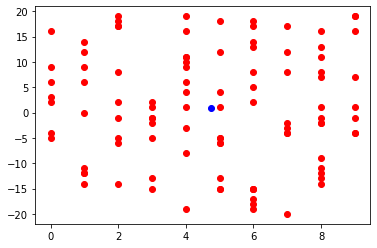

-0.591515151515151
[[  7.52767677  -0.59151515]
 [ -0.59151515 123.99636364]]


In [34]:
## DataFrame이 제공하는 함수들 (짐계함수 통계기반함수 등등)

display(df)

# 기대값(expected value) 
# 주사위 한개를 무한히 던졌을때 기대값
import numpy as np
result = np.random.randint(1,7,(1000000,))
print(result.mean())

# 편차(deviation) 
# 확률변수 x와 평균(기대값)의 차이를 편차라고 함
# std deviation : 표준편차 : 분산의 제곱근
arr = np.array([4,6,1,3,8,8], dtype=np.int32)
print(arr)
print(arr.sum())  #30
print(arr.mean())  #5.0
print(arr.var())  #6.666666666666667
print(arr.std())  #2.581988897471611
print(' ')

## 공분산 : 두 확률변수의 편차의 곱에대한 평균 
# 두 확률변수의 관계를 알아보기위해
import matplotlib.pyplot as plt
# 독립변수 X에 대해 종속변수 Y의
np.random.seed(2)
sampleNum = 100
x = np.random.randint(0, 10, (sampleNum,))
y = np.random.randint(-20, 20, (sampleNum,))
x_mean = x.mean()
y_mean = y.mean()
# 이걸로 scatter(산점도)
plt.scatter(x,y,color='red')
plt.scatter(x_mean,y_mean,color='blue')
plt.show()

# 공분산은 데이터의 변화량에 대한 총합을 의미
# 공분산이 양수인지 음수인지에 따라서 데이터의 방향성을 알수있다.
# 단점 : 연관성, 방향성은 알 수 있지만 그 강도는 알 수 없음

# 만약 확률변수 x와 y가 독립이면 공분산이 0에 수렴함(역은 설립하지않음)

x_deviation = x - x_mean
y_deviation = y - y_mean
result = 0
for tmp in range(sampleNum):
    result += x_deviation[tmp] * y_deviation[tmp]

result_covariance = result / (sampleNum-1)  # 표준공분산
print(result_covariance) # -0.591515151515151 # x가 증가하면 y가 감소한다는 뜻

# numpy의 공분산 함수
print(np.cov(x,y))

In [ ]:
# 상관계수(correlation coefficient)


In [55]:
# DataFrame 분석용 함수
import numpy as np
import pandas as pd

# 중첩리스트로 데이터프레임을 만들어보자
data = [[2,np.nan], 
        [7,-3], 
        [np.nan,np.nan], 
        [1,-2]]
df = pd.DataFrame(data, 
                  columns=['one','two'], 
                  index=['a','b','c','d'])
display(df)
print(df.sum()) # numpy와 달리 데이터프레임은 sum() 이 자동으로 axis=0
print(df.sum(axis=1))  # Series로 리턴
print(df['one'].sum()) # 특정 열에 대해서 합

# 데이터프레임 정렬

np.random.seed(1)
df = pd.DataFrame(np.random.randint(0,10,(6,4)))

df.columns = ['A','B','C','D']
df.index = pd.date_range('20200101', periods=6)

display(df)

# 셔플하기 # permutation
random_date = np.random.permutation(df.index) # 인덱스를 수정하지 않고 랜덤으로 섞음
df2 = df.reindex(index=random_date, columns=['B','A','D','C'])
display(df2)
# np.random.permutation(df.index.values)
# display(df)

# 인덱스로 정렬
display(df2.sort_index(axis=0, ascending=True))
display(df2.sort_index(axis=1, ascending=True))

# 값으로 정렬
display(df2.sort_values(by=['B', 'A']))

,one,two
a,2.0,NaN
b,7.0,-3.0
c,NaN,NaN
d,1.0,-2.0


one    10.0
two    -5.0
dtype: float64
a    2.0
b    4.0
c    0.0
d   -1.0
dtype: float64
10.0


,A,B,C,D
2020-01-01,5,8,9,5
2020-01-02,0,0,1,7
2020-01-03,6,9,2,4
2020-01-04,5,2,4,2
2020-01-05,4,7,7,9
2020-01-06,1,7,0,6


,B,A,D,C
2020-01-03,9,6,4,2
2020-01-01,8,5,5,9
2020-01-04,2,5,2,4
2020-01-05,7,4,9,7
2020-01-02,0,0,7,1
2020-01-06,7,1,6,0


,B,A,D,C
2020-01-01,8,5,5,9
2020-01-02,0,0,7,1
2020-01-03,9,6,4,2
2020-01-04,2,5,2,4
2020-01-05,7,4,9,7
2020-01-06,7,1,6,0


,A,B,C,D
2020-01-03,6,9,2,4
2020-01-01,5,8,9,5
2020-01-04,5,2,4,2
2020-01-05,4,7,7,9
2020-01-02,0,0,1,7
2020-01-06,1,7,0,6


,B,A,D,C
2020-01-02,0,0,7,1
2020-01-04,2,5,2,4
2020-01-06,7,1,6,0
2020-01-05,7,4,9,7
2020-01-01,8,5,5,9
2020-01-03,9,6,4,2


In [ ]:
## 여러가지 함수들

#
# value_counts()
# isin()
# apply lambda

In [4]:
# DataFrame의 결합(merge) : database에 table join가능

import numpy as np
import pandas as pd

data1 = {'학번':[1,2,3,4,5], 
         '이름':['이지은','박동훈','홍길동','강감찬','오혜영'], 
         '학과':['컴퓨터','기계','철학','컴퓨터','국어국문']}

data2 = {'학번':[1,2,4,5,6], 
         '학년':[1,2,2,4,3],
         '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
display(df1)
display(df2)

# inner join : 교집합
result = pd.merge(df1, df2, on='학번', how='inner')
display(result)
# full outer join : 합집합
result = pd.merge(df1, df2, on='학번', how='outer')
display(result)
# left outer join : df1 - df2 + inner
result = pd.merge(df1, df2, on='학번', how='left')
# right outer join : df2 - df1 + inner
result = pd.merge(df1, df2, on='학번', how='right')


,학번,이름,학과
0,1,이지은,컴퓨터
1,2,박동훈,기계
2,3,홍길동,철학
3,4,강감찬,컴퓨터
4,5,오혜영,국어국문


,학번,학년,학점
0,1,1,1.5
1,2,2,2.0
2,4,2,3.1
3,5,4,1.1
4,6,3,2.7


,학번,이름,학과,학년,학점
0,1,이지은,컴퓨터,1,1.5
1,2,박동훈,기계,2,2.0
2,4,강감찬,컴퓨터,2,3.1
3,5,오혜영,국어국문,4,1.1


,학번,이름,학과,학년,학점
0,1,이지은,컴퓨터,1.0,1.5
1,2,박동훈,기계,2.0,2.0
2,3,홍길동,철학,NaN,NaN
3,4,강감찬,컴퓨터,2.0,3.1
4,5,오혜영,국어국문,4.0,1.1
5,6,NaN,NaN,3.0,2.7


In [9]:
# 컬럼과 인덱스를 사용한 merge
data1 = {'학번':[1,2,3,4,6], 
         '이름':['이지은','박동훈','홍길동','강감찬','오혜영'], 
         '학과':['컴퓨터','기계','철학','컴퓨터','국어국문']}

data2 = {'학년':[1,2,2,4,3],
         '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2, index=[1,2,3,4,6])
display(df1)
display(df2)

result = pd.merge(df1, df2, 
                  left_on='학번', right_index=True, how='inner')
display(result)

result.iloc[2]

,학번,이름,학과
0,1,이지은,컴퓨터
1,2,박동훈,기계
2,3,홍길동,철학
3,4,강감찬,컴퓨터
4,6,오혜영,국어국문


,학년,학점
1,1,1.5
2,2,2.0
3,2,3.1
4,4,1.1
6,3,2.7


,학번,이름,학과,학년,학점
0,1,이지은,컴퓨터,1,1.5
1,2,박동훈,기계,2,2.0
2,3,홍길동,철학,2,3.1
3,4,강감찬,컴퓨터,4,1.1
4,6,오혜영,국어국문,3,2.7


학번      3
이름    홍길동
학과     철학
학년      2
학점    3.1
Name: 2, dtype: object

In [16]:
# 시리즈 결합하기
# concatenation(연결)
import numpy as np
import pandas as pd

s1 = pd.Series([0,1], index=['a','c'])
s2 = pd.Series([4,3,2], index=['b','c','e'])
s3 = pd.Series([5,6], index=['f','g'])

print(pd.concat([s1,s2,s3], axis=0))
display(pd.concat([s1,s2,s3], axis=1, sort=True))

a    0
c    1
b    4
c    3
e    2
f    5
g    6
dtype: int64


,0,1,2
a,0.0,NaN,NaN
b,NaN,4.0,NaN
c,1.0,3.0,NaN
e,NaN,2.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [18]:
# DataFrame 연결
import numpy as np
import pandas as pd

df1 = pd.DataFrame(np.arange(6).reshape(3,2),
                   index=['a','c','b'], columns=['one','two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2),
                   index=['a','b'], columns=['three','four'])
display(df1)
display(df2)

result = pd.concat([df1,df2], axis=1, sort=True)
display(result)

result = pd.concat([df1,df2], axis=0, ignore_index=False, sort=True)
# 여기서 sort = 컬럼을 새롭게 정렬
display(result)

,one,two
a,0,1
c,2,3
b,4,5


,three,four
a,5,6
b,7,8


,one,two,three,four
a,0,1,5.0,6.0
b,4,5,7.0,8.0
c,2,3,NaN,NaN


In [27]:

np.random.seed(0)
df = pd.DataFrame(np.random.randint(0,10,(6,4)))
df.index = pd.date_range('20200101', '20200106')  # 판다스는 datetime 안써도 됨
df.columns = ['A','B','C','D']

df['E'] = [7,np.nan,4,np.nan,2,np.nan]

display(df)

# 결측치는 어떻게 해결할까?
# 결측치 들어간 행 삭제 : 편하지만 있는 데이터도 날아가서 별로임. 결측치가 엄청 많은 경우도 있음

# 결측치 제거
new_df = df.dropna(how='any', inplace=False)  # any : 하나라도 NaN이 있으면 행 삭제
                                                # all : 행의 모든 것이 NaN이면 행 삭제
display(new_df)

# 하지만 일반적으로는 이 결측치를 다른 값으로 대체해서 사용
# 평균, max min 등등 방법...
new_df = df.fillna(value=0)
display(new_df)

#
my_mask = df['E'].isnull()  # boolean mask
display(df.loc[my_mask, :])

,A,B,C,D,E
2020-01-01,5,0,3,3,7.0
2020-01-02,7,9,3,5,NaN
2020-01-03,2,4,7,6,4.0
2020-01-04,8,8,1,6,NaN
2020-01-05,7,7,8,1,2.0
2020-01-06,5,9,8,9,NaN


,A,B,C,D,E
2020-01-01,5,0,3,3,7.0
2020-01-03,2,4,7,6,4.0
2020-01-05,7,7,8,1,2.0


,A,B,C,D,E
2020-01-01,5,0,3,3,7.0
2020-01-02,7,9,3,5,0.0
2020-01-03,2,4,7,6,4.0
2020-01-04,8,8,1,6,0.0
2020-01-05,7,7,8,1,2.0
2020-01-06,5,9,8,9,0.0


,A,B,C,D,E
2020-01-02,7,9,3,5,NaN
2020-01-04,8,8,1,6,NaN
2020-01-06,5,9,8,9,NaN


In [34]:
# 중복행처리
import numpy as np
import pandas as pd

df = pd.DataFrame({'k1' : ['one'] * 3 + ['two'] * 4, 
                   'k2' : [1,1,2,3,3,4,4]})
display(df)

print(df.duplicated())  # 중복행에 대한 boolean mask
df.loc[df.duplicated(), :]  # 중복행 추출
display(df.drop_duplicates())  # 중복행 다 지워

# 특정 열을 기준으로 중복 행을 지우기
df = pd.DataFrame({'k1' : ['one'] * 3 + ['two'] * 4, 
                   'k2' : [1,1,2,3,3,4,4], 
                   'k3' : np.arange(7)})
display(df.drop_duplicates(['k1','k2']))

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool


,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


,k1,k2,k3
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [45]:
## DataFrame Grouping
import numpy as np
import pandas as pd
my_dict = {'학과':['컴퓨터','체육교육과','컴퓨터','체육교육과','컴퓨터'],
           '학년':[1,2,3,2,3], 
           '이름':['홍길동','김연아','최길동','이지은','신사임당'],            
           '학점':[1.5, 4.4, 3.7, 4.5, 3.8]}

df = pd.DataFrame(my_dict)
display(df)

# 학과를 기준으로 학점을 그룹핑해보자
dept = df['학점'].groupby(df['학과'])
display(dept)

# 그룹안에 데이터를 확인하고 싶은 경우 get_group
print(dept.get_group('컴퓨터'))

# 각 그룹의 사이즈를 확이나고 싶은 경우 size()
print(dept.size())

# 평균
print(dept.mean())

print(' ')
# 2단계 그룹핑도 가능
dept_year = df['학점'].groupby([df['학과'], df['학년']])
print(dept_year.mean())
# 시리즈의 인덱스가 여러개가 된거임 학과랑 학년
# DataFrame에서 지원하는 기능

# unstack() : 최하위 index를 cloumn으로 설정
print(dept_year.mean().unstack())

,학과,학년,이름,학점
0,컴퓨터,1,홍길동,1.5
1,체육교육과,2,김연아,4.4
2,컴퓨터,3,최길동,3.7
3,체육교육과,2,이지은,4.5
4,컴퓨터,3,신사임당,3.8


0    1.5
2    3.7
4    3.8
Name: 학점, dtype: float64
학과
체육교육과    2
컴퓨터      3
Name: 학점, dtype: int64
학과
체육교육과    4.45
컴퓨터      3.00
Name: 학점, dtype: float64
 
학과     학년
체육교육과  2     4.45
컴퓨터    1     1.50
       3     3.75
Name: 학점, dtype: float64
학년       1     2     3
학과                    
체육교육과  NaN  4.45   NaN
컴퓨터    1.5   NaN  3.75


In [53]:
import numpy as np
import pandas as pd
my_dict = {'학과':['컴퓨터','체육교육과','컴퓨터','체육교육과','컴퓨터'],
           '학년':[1,2,3,2,3], 
           '이름':['홍길동','김연아','최길동','이지은','신사임당'],            
           '학점':[1.5, 4.4, 3.7, 4.5, 3.8]}

df = pd.DataFrame(my_dict)
display(df)

# DataFrame을 그룹핑해보자
df_group_dept = df.groupby([df['학과'], df['학년']])
display(df_group_dept.mean().unstack())

# 학과별 평균 학점 구해보기
print(df['학점'].groupby(df['학과']).mean())
# 학과에 몇명있냐
print(df.groupby(df['학과']).size())

,학과,학년,이름,학점
0,컴퓨터,1,홍길동,1.5
1,체육교육과,2,김연아,4.4
2,컴퓨터,3,최길동,3.7
3,체육교육과,2,이지은,4.5
4,컴퓨터,3,신사임당,3.8


학점            
학년       1     2     3
학과                    
체육교육과  NaN  4.45   NaN
컴퓨터    1.5   NaN  3.75

학과
체육교육과    4.45
컴퓨터      3.00
Name: 학점, dtype: float64
학과
체육교육과    2
컴퓨터      3
dtype: int64


In [55]:
import numpy as np
import pandas as pd
my_dict = {'학과':['컴퓨터','체육교육과','컴퓨터','체육교육과','컴퓨터'],
           '학년':[1,2,3,2,3], 
           '이름':['홍길동','김연아','최길동','이지은','신사임당'],            
           '학점':[1.5, 4.4, 3.7, 4.5, 3.8]}

df = pd.DataFrame(my_dict)
display(df)

# 학과로 그룹핑한 후 for문으로 반복처리하기
for (dept, group) in df.groupby(df['학과']):
    print(dept)
    display(group)
    print('=======')

# 2단계 그룹핑도 가능
for ((dept,year), group) in df.groupby([df['학과'], df['학년']]):
    print(dept)
    display(group)
    print('=======')

,학과,학년,이름,학점
0,컴퓨터,1,홍길동,1.5
1,체육교육과,2,김연아,4.4
2,컴퓨터,3,최길동,3.7
3,체육교육과,2,이지은,4.5
4,컴퓨터,3,신사임당,3.8


체육교육과


,학과,학년,이름,학점
1,체육교육과,2,김연아,4.4
3,체육교육과,2,이지은,4.5


컴퓨터


,학과,학년,이름,학점
0,컴퓨터,1,홍길동,1.5
2,컴퓨터,3,최길동,3.7
4,컴퓨터,3,신사임당,3.8


체육교육과


,학과,학년,이름,학점
1,체육교육과,2,김연아,4.4
3,체육교육과,2,이지은,4.5


컴퓨터


,학과,학년,이름,학점
0,컴퓨터,1,홍길동,1.5


컴퓨터


,학과,학년,이름,학점
2,컴퓨터,3,최길동,3.7
4,컴퓨터,3,신사임당,3.8
